<a href="https://colab.research.google.com/github/fstrug/ColumnarQuickstart/blob/master/NIUCompPhys_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

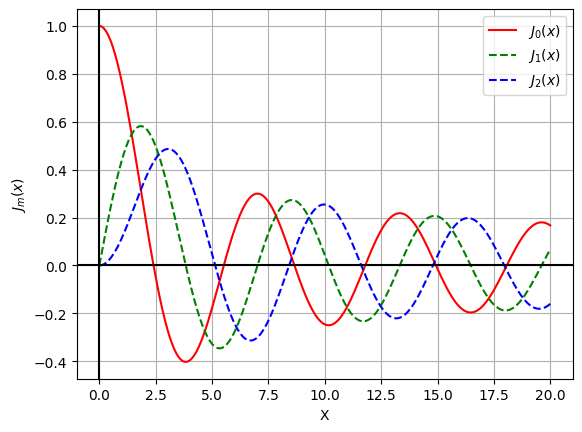

In [2]:

"""
Problem 1 - Exercise 5.4
"""
import numpy as np
import matplotlib.pyplot as plt

# with the 'fancy' method cannot use numpy (shapes don't broadcast nicely)
# Might not be best since we now have for loops but it works!
def simpson_simple(f, a, b, n):
  h= (b-a)/n
  i = np.arange(0,n)

  s1 = 0
  s2 = 0
  for k in range(1,n,2):
    s1 += f(a+k*h)
  for k in range(2,n,2):
    s2 += f(a+k*h)

  s = f(a) + f(b)
  s += 4 * s1
  s += 2 * s2

  return s*h/3


def J_integrand(m, x):
  func = lambda theta: np.cos(m*theta - x*np.sin(theta))
  return func


def J(m):
  J_mx = lambda x: simpson_simple(J_integrand(m,x), 0, np.pi, 1000)/np.pi
  return(J_mx)

x = np.linspace(0, 20, 200)
#Format to look like wikipedia page for easy solution check
#https://en.wikipedia.org/wiki/Bessel_function
plt.plot(x, J(0)(x), 'r-' , label = "$J_0(x)$")
plt.plot(x, J(1)(x), 'g--', label = "$J_1(x)$")
plt.plot(x, J(2)(x), 'b--', label = "$J_2(x)$")
plt.grid()
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axvline(x = 0, color = 'black', linestyle = '-')
plt.xlabel("X")
plt.ylabel("$J_m(x)$")
plt.legend()
plt.show()

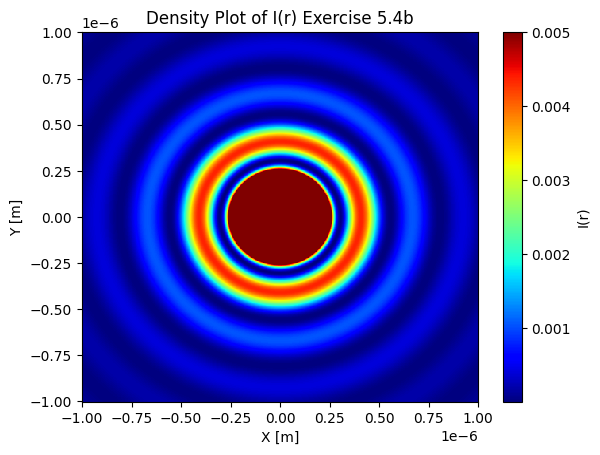

In [3]:
lamb = 500e-9
k = (2*np.pi) / lamb
I_r = lambda x, y: ((J(1)(k*np.sqrt(x**2+y**2)))/(k*np.sqrt(x**2+y**2)))**2
#Takes a minute to run to get high granularity for log plot
x, y = np.meshgrid(np.linspace(-1e-6, 1e-6, 500), np.linspace(-1e-6, 1e-6, 500))

z = I_r(x,y)

fig, ax = plt.subplots()
c = plt.pcolormesh(x, y, z, cmap = "jet", vmax = 0.005)
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Density Plot of I(r) Exercise 5.4b")
fig.colorbar(c, ax=ax, label = "I(r)")
plt.show()

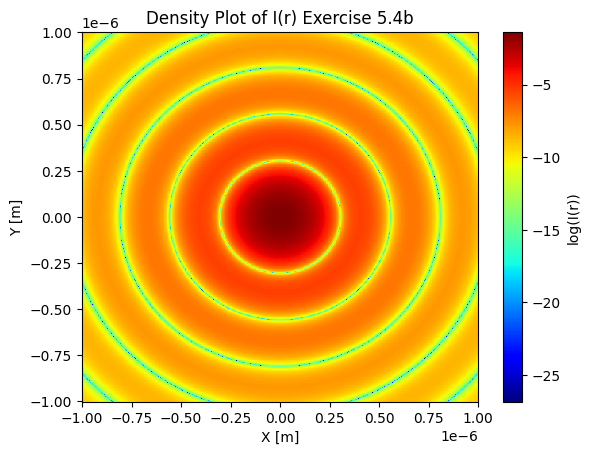

In [4]:
#Also interesting to see log plot
fig1, ax1 = plt.subplots()
c1 = plt.pcolormesh(x, y, np.log(z), cmap = "jet")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Density Plot of I(r) Exercise 5.4b")
fig.colorbar(c1, ax=ax1, label = "log(I(r))")
plt.show()

Text(0.5, 1.0, 'Period of a mass in a $V(x)=x^4$ potential.')

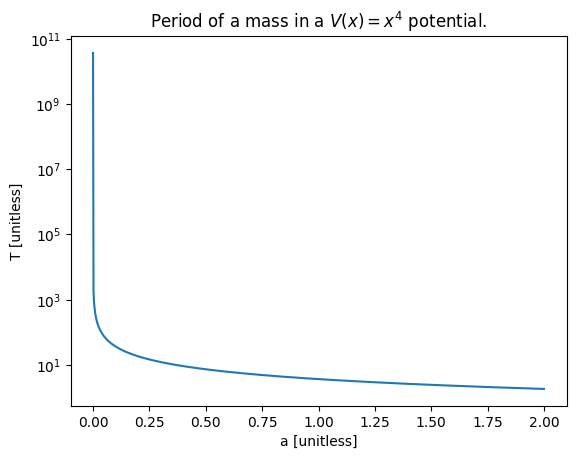

In [5]:
"""
Problem 2 - Exercise 5.10
"""
########################################
# Check supporting document for 5.10a) #
########################################
from numpy import ones,copy,cos,tan,pi,linspace
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def integrateGauss(N,a,b,f):
  integral = 0
  x,w = gaussxwab(N,a,b)


  for k in range(N):
    integral = integral+w[k]*f(x[k])
  return(integral)

#Define function to integrate
def integrand(a):
  integrand = lambda x: 1/np.sqrt(np.power(a,4)-np.power(x,4))
  return(integrand)

N = 20
a = np.linspace(1e-10, 2, 1000)
m = 1
outputs = []
for val in a:
  integrand_o = integrand(val)
  integral = np.sqrt(8*m)*integrateGauss(N, 0, val, integrand_o)
  outputs.append(integral)

plt.plot(a, outputs)
plt.yscale("log")
plt.xlabel("a [unitless]")
plt.ylabel("T [unitless]")
plt.title("Period of a mass in a $V(x)=x^4$ potential.")


For the potentials V(x)\~x^2 and V'(x)\~x^4, the corresponding forces experienced by the mass are F(x)\~x and F'(x)\~x^3.

For F'(x), the force grows faster (x^3) than the distance x the mass has to travel. Therefore the period becomes smaller and smaller for large values of a.

For F(x), the force scales directly with x so the period does not diverge as x->0. For F'(x), the force approaches 0 more quickly than the initial position x, so the period exhibits this divergent behavior.

Text(0, 0.5, '$I/I_o$')

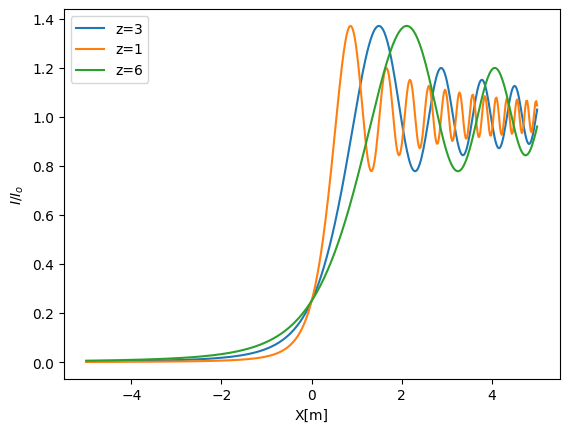

In [6]:
"""
Problem 3 - Exercise 5.11
For 5.11 plot on the same axis the result from z=3m and also z=1m and z=6m.
Explain what you see
"""


S_int = lambda t: np.sin((np.pi*(t**2))/2)
C_int = lambda t: np.cos((np.pi*(t**2))/2)

def S(x):
  result = integrateGauss(50, 0, x, S_int)
  return(result)

def C(x):
  result = integrateGauss(50, 0, x, C_int)
  return(result)

x = np.linspace(-5,5, 500)
def Calc_I_normalized(x, z, lambd):
  outputs = []
  for val in x:
    val_prime = val*np.sqrt(2/(lambd*z))
    I_normalized = (1/8)*((2*C(val_prime)+1)**2 + (2*S(val_prime)+1)**2)
    outputs.append(I_normalized)
  return(outputs)

plt.plot(x, Calc_I_normalized(x, 3, 1), label="z=3")
plt.plot(x, Calc_I_normalized(x, 1, 1), label="z=1")
plt.plot(x, Calc_I_normalized(x, 6, 1), label="z=6")
plt.legend()
plt.xlabel("X[m]")
plt.ylabel("$I/I_o$")


As z becomes larger, you see the oscillations decrease in frequency as a function of x.

For $x<0$ (below the edge), for smaller z the amplitude drops more quickly. For a fixed $x<0$ you can hear better by moving away from the edge.

We can see that as x becomes large (above the edge), the diffraction effect becomes less noticeable as the wave becomes more plane-like.

Regardless of z-value, it seems that the amplitudes are converging as x becomes larger. Approximation begins to breaks down for x much greater than z*lambda. Already at x~7 z=1, we begin to see the approximation giving bad results.

Text(0, 0.5, '$I/I_o$')

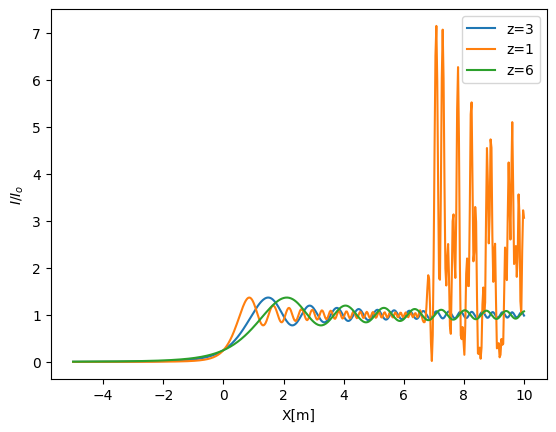

In [7]:
x = np.linspace(-5,10, 500)
def Calc_I_normalized(x, z, lambd):
  outputs = []
  for val in x:
    val_prime = val*np.sqrt(2/(lambd*z))
    I_normalized = (1/8)*((2*C(val_prime)+1)**2 + (2*S(val_prime)+1)**2)
    outputs.append(I_normalized)
  return(outputs)

plt.plot(x, Calc_I_normalized(x, 3, 1), label="z=3")
plt.plot(x, Calc_I_normalized(x, 1, 1), label="z=1")
plt.plot(x, Calc_I_normalized(x, 6, 1), label="z=6")
plt.legend()
plt.xlabel("X[m]")
plt.ylabel("$I/I_o$")

Text(0.5, 1.0, 'Force of uniform sheet on 1kg Ball')

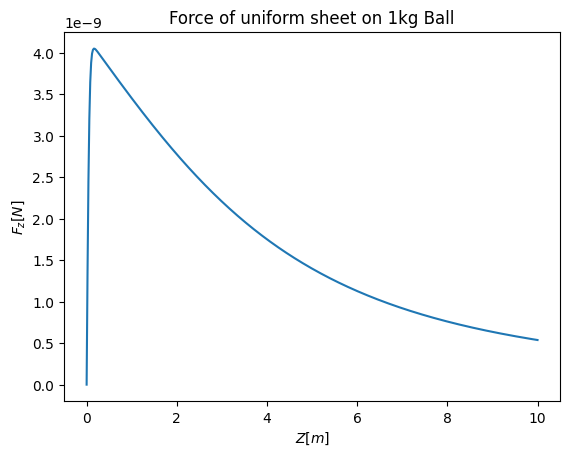

In [8]:
"""
Problem 4 - Exercise 5.14
For this problem, you will need to do a two-dimensional Gaussian integration.
Treat both dimensions as independent of one another and then the integration is
straightforwards. And also note that the limits of your integration are the same
so you only have to call gausswxab once!
"""
########################################
# Check supporting document for 5.14a) #
########################################
def integrateGauss_2d(N,a,b,f):
  integral = 0
  x,w = gaussxwab(N,a,b)

  for k in range(N):
    for j in range(N):
      integral = integral+w[k]*w[j]*f(x[k], x[j])
  return(integral)


def func(z):
  func = lambda x, y: z/np.power(x**2+y**2+z**2, 3/2)
  return(func)

# Constants
l=10 # [m]
G=6.674e-11 # [m^3 kg^-1 s^-2]
sigma = 10 # 10,000 /100  [kg m^-2]

### Original Problem
### Over range z = [0,10]
z = np.linspace(0,10,500)
output = []
# Evaluate F(z)
for val in z:
  result = integrateGauss_2d(100, -l/2, l/2, func(val))
  result = G*sigma*result
  output.append(result)

plt.plot(z, output)
plt.xlabel("$Z[m]$")
plt.ylabel("$F_{z} [N]$")
plt.title("Force of uniform sheet on 1kg Ball")

The gaussian quadrature method gives larger uncertainties when between sample points the function is not sufficiently smooth. As z->0, The integrand becomes $\frac{1}{x^2+y^2}$ and at x=0, y=0 the integrand diverges.

To remedy this, we can break up the integral into two pieces. The first integral will be in the neighborhood of the divergence, and the second will cover the rest of the function where it is smooth. We will then use a larger number of points for the first integral. This idea is tested out below.

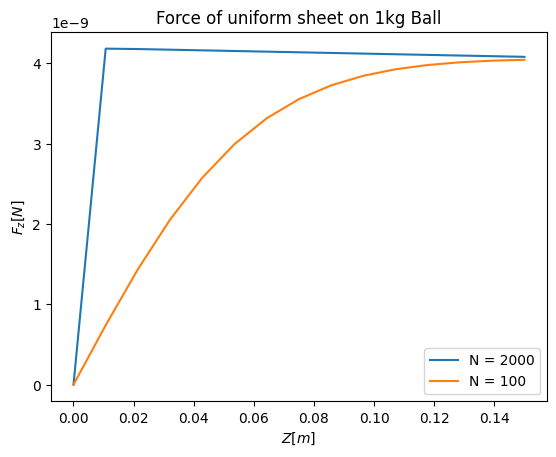

In [9]:
### Over range z = [0,1]
z = np.linspace(0,.15,15)
output = []
# Evaluate F(z)
for val in z:
  result = integrateGauss_2d(2000, -l/2, l/2, func(val))
  result = G*sigma*result
  output.append(result)

z_p = np.linspace(0,.15,15)
output_p = []
# Evaluate F(z)
for val in z_p:
  result = integrateGauss_2d(100, -l/2, l/2, func(val))
  result = G*sigma*result
  output_p.append(result)

plt.plot(z, output, label = "N = 2000")
plt.plot(z_p, output_p, label = "N = 100")
plt.xlabel("$Z [m]$")
plt.ylabel("$F_{z} [N]$")
plt.title("Force of uniform sheet on 1kg Ball")
plt.legend()

As can be seen above by increasing N substantially (N = 100 -> N = 2000) we get a much better solution in the neighborhood z=0.